**1. Data Preparation & Feature extraction**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
train_data = pd.read_csv('/content/male_players (legacy).csv')
test_data = pd.read_csv('/content/players_22.csv')


In [ ]:
#dropping irrelevant columns especially those that come up with high correlation(0.6+)

unnecesary_columns = ['player_url', 'league_id','rcm', 'lcm', 'cm', 'wage_eur', 'fifa_update', 'fifa_update_date', 'fifa_version', 'long_name',
                      'club_team_id', 'club_jersey_number', 'club_loaned_from', 'club_joined_date',
                      'club_contract_valid_until_year', 'nationality_id', 'nation_team_id', 'release_clause_eur',
                      'player_face_url']

existing_columns = [col for col in unnecesary_columns if col in train_data.columns ]

train_data.drop(columns= existing_columns, inplace = True)
#print(train_data.head())


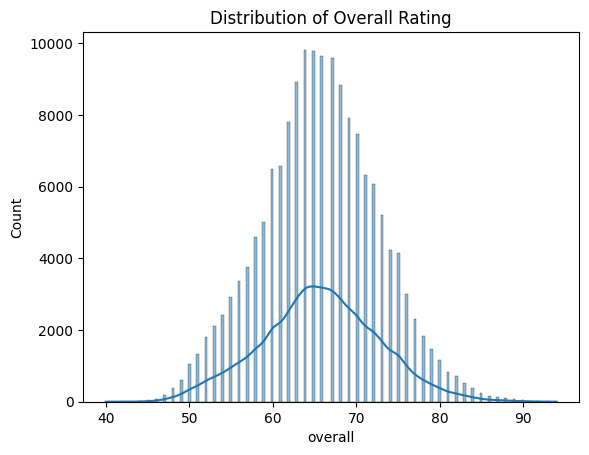

In [ ]:
sns.histplot(train_data['overall'], kde=True)
plt.title('Distribution of Overall Rating')
plt.show()

In [ ]:
#missing values
missing_values = train_data.isnull().sum()
print(missing_values)

#Filling missing values with mean for numerical values

num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
train_data[num_cols] = imputer.fit_transform(train_data[num_cols])

#encoding categorical variables

categ_cols = train_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

train_data[categ_cols] = train_data[categ_cols].astype(str)

train_data[categ_cols] = train_data[categ_cols].apply(label_encoder.fit_transform)



player_id           0
short_name          0
player_positions    0
overall             0
potential           0
                   ..
lcb                 0
cb                  0
rcb                 0
rb                  0
gk                  0
Length: 91, dtype: int64


**2. Correlation with dependent variable**

In [ ]:
correl_matr = train_data.corr()
corr_with_depend_var = correl_matr['overall'].abs().sort_values(ascending=False)
print(corr_with_depend_var)

overall                    1.000000
movement_reactions         0.845753
potential                  0.695362
passing                    0.632617
mentality_composure        0.604074
                             ...   
short_name                 0.014701
goalkeeping_diving         0.013603
goalkeeping_reflexes       0.011783
goalkeeping_handling       0.010862
goalkeeping_positioning    0.004731
Name: overall, Length: 91, dtype: float64


In [ ]:
#getting features with highest correlation

signific_features = corr_with_depend_var[corr_with_depend_var > 0.6]

focus_features = train_data[signific_features.index]

scaler = StandardScaler()
focus_feat = scaler.fit_transform(focus_features)

scaled_feat = pd.DataFrame(focus_feat, columns=focus_features.columns)

print(scaled_feat.head())


    overall  movement_reactions  potential       passing  mentality_composure
0  3.877514            3.535775   3.875315  2.940185e+00         6.456683e-16
1  3.735485            3.099571   3.396013  2.434335e+00         6.456683e-16
2  3.451428            2.990520   3.076478  2.636675e+00         6.456683e-16
3  3.451428            2.554317   3.076478  2.434335e+00         6.456683e-16
4  3.451428            2.990520   3.076478 -7.188561e-16         6.456683e-16


**3. Training models**

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/male_players (legacy).csv')

# Define features (independent variables) and target variable
X = df.drop(columns=['overall'])
y = df['overall']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores)**0.5  # Take square root to get RMSE scores

# Fit the model on the entire training set
rf_model.fit(X_train, y_train)

# Evaluate model performance on the test set
y_pred = rf_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print cross-validation RMSE scores and test RMSE
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Average Cross-Validation RMSE:", cv_rmse_scores.mean())
print("Test RMSE:", test_rmse)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: '/player/194945/roland-varga/230002'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: '/player/192445/daniel-ginczek/190002'


**4. Evaluation**

**5. Testing with new dataset**

In [ ]:
x_new = test_data.drop(columns = ['overall'])
y_new = test_data['overall']

predicted_ratings = rf_model.predict(x_new)
print(predicted_ratings)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- club_contract_valid_until
- club_flag_url
- club_jersey_number
- club_joined
- club_loaned_from
- ...
Feature names seen at fit time, yet now missing:
- player_id
